In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime
import seaborn as sn
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

%matplotlib inline
# Any results you write to the current directory are saved as output.

## This intial analysis leverages the initial EDA done by Vivek Srinivasan on:
- https://www.kaggle.com/viveksrinivasan/eda-ensemble-model-top-10-percentile 

**Load Dataset**

In [4]:
BikeData = pd.read_csv("train.csv")

**Exploratory Data Analysis**

In [5]:
BikeData.shape

(10886, 12)

**Data Types of the Variables**

In [6]:
BikeData.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [7]:
BikeData.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
#Convert BikeData.datetime to datetime
BikeData.datetime = pd.to_datetime(BikeData.datetime)
#Extract Month
BikeData['month'] = BikeData.datetime.dt.month
#Extract Hour
BikeData['hour'] = BikeData.datetime.dt.hour


In [9]:
categoryVariableList = ["hour","month","season","weather","holiday","workingday"]
for var in categoryVariableList:
    BikeData[var] = BikeData[var].astype("category")

In [10]:
BikeData.dtypes

datetime      datetime64[ns]
season              category
holiday             category
workingday          category
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
month               category
hour                category
dtype: object

In [11]:
BikeData.groupby("month")['count'].mean()

month
1      90.366516
2     110.003330
3     148.169811
4     184.160616
5     219.459430
6     242.031798
7     235.325658
8     234.118421
9     233.805281
10    227.699232
11    193.677278
12    175.614035
Name: count, dtype: float64

 None]

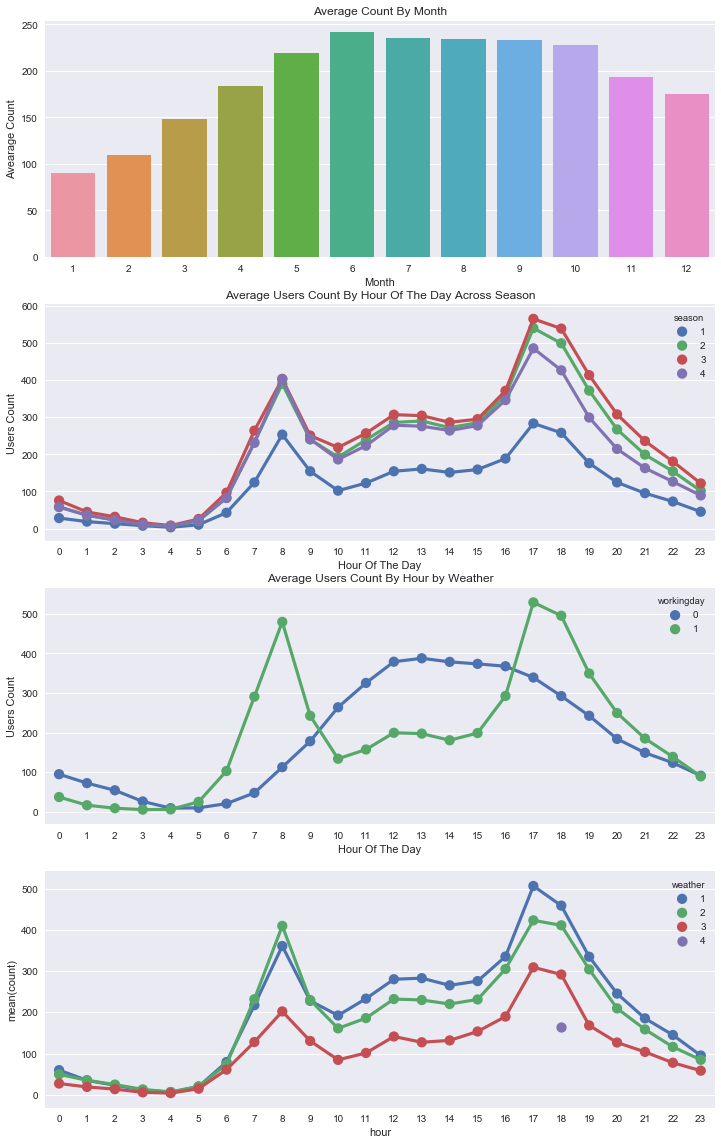

In [12]:
fig,(ax1,ax2,ax3,ax4)= plt.subplots(nrows=4)
fig.set_size_inches(12,20)

monthAggregated = pd.DataFrame(BikeData.groupby("month")["count"].mean()).reset_index()
#monthSorted = monthAggregated.sort_values(by="count",ascending=False)

sn.barplot(data=pd.DataFrame(BikeData.groupby("month")["count"].mean()).reset_index(),x="month",y="count",ax=ax1)
ax1.set(xlabel='Month', ylabel='Avearage Count',title="Average Count By Month")

hourAggregated = pd.DataFrame(BikeData.groupby(["hour","season"],sort=True)["count"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["season"], data=hourAggregated, join=True,ax=ax2)
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season",label='big')

WorkDayAggregated = pd.DataFrame(BikeData.groupby(["hour","workingday"],sort=True)["count"].mean()).reset_index()
sn.pointplot(x=WorkDayAggregated["hour"], y=WorkDayAggregated["count"],hue=WorkDayAggregated["workingday"], data=hourAggregated, join=True,ax=ax3)
ax3.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day for Workdays/Non Work Days",label='big')

WorkDayAggregated = pd.DataFrame(BikeData.groupby(["hour","weather"],sort=True)["count"].mean()).reset_index()
sn.pointplot(x=WorkDayAggregated["hour"], y=WorkDayAggregated["count"],hue=WorkDayAggregated["weather"], data=hourAggregated, join=True,ax=ax4)
ax3.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour by Weather",label='big')